<a href="https://colab.research.google.com/github/nilavya2000/tf_tutorial/blob/master/tf_fashio_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import numpy as np
import matplotlib.pyplot as plt
import math
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

importing the dataset

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
dataset

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [ ]:
class_names=['Tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'Ankle boot']

In [ ]:
num_train_example = metadata.splits['train'].num_examples
num_test_example = metadata.splits['test'].num_examples
print('train : {}'.format(num_train_example))
print('test : {}'.format(num_test_example))

train : 60000
test : 10000


In [ ]:
def normalize(images, labels):
  images=tf.cast(images, tf.float32)
  images/=255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset=train_dataset.cache()
test_dataset = test_dataset.cache()



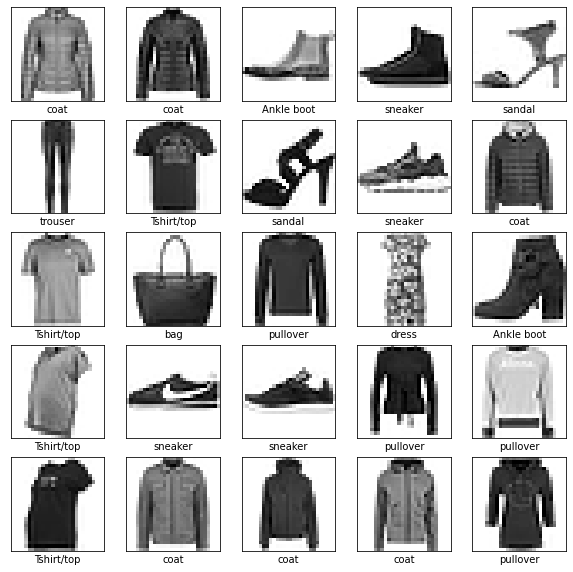

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

**Build the model**




In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

***Compile the model***

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

***train the model***

In [ ]:
b_size=32
train_dataset=train_dataset.cache().repeat().shuffle(num_train_example).batch(b_size)
test_dataset=test_dataset.cache().batch(b_size)

In [ ]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_example/b_size))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4108 - accuracy: 0.8512
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2686 - accuracy: 0.9025
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2291 - accuracy: 0.9166
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1906 - accuracy: 0.9305
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1668 - accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1427 - accuracy: 0.9476
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1203 - accuracy: 0.9561
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1025 - accuracy: 0.9621
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0881 - accuracy: 0.9679
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_example/32))
print(test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.2934 - accuracy: 0.9213
0.9212999939918518


In [ ]:
for test_image, test_labels in test_dataset.take(1):
  test_image = test_image.numpy()
  test_labels = test_labels.numpy()
  prediction = model.predict(test_image) 

In [ ]:
prediction[0]

array([3.3704715e-09, 9.3436529e-11, 6.3330104e-04, 3.6094883e-10,
       9.9709725e-01, 4.3163181e-10, 2.2694496e-03, 8.8089792e-11,
       1.7229570e-12, 7.1026962e-10], dtype=float32)

In [ ]:
np.argmax(prediction[0])

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label =predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

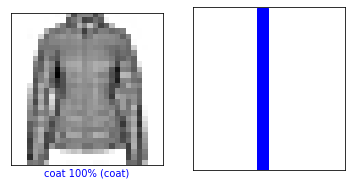

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

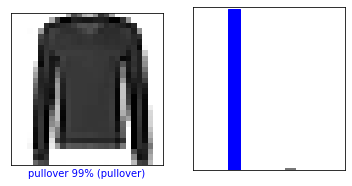

In [ ]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

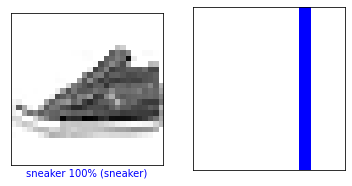

In [ ]:
i=30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

NameError: ignored